#Van der Pol oscillator

http://en.wikipedia.org/wiki/Van_der_Pol_oscillator
http://www.opencor.ws/user/howToGetStarted.html

In dynamics, the Van der Pol oscillator is a non-conservative oscillator with non-linear damping. 

## History
The Van der Pol oscillator was originally proposed by the Dutch electrical engineer and physicist Balthasar van der Pol while he was working at Philips. Van der Pol found stable oscillations, which he called relaxation-oscillations[2] and are now known as limit cycles, in electrical circuits employing vacuum tubes. When these circuits were driven near the limit cycle they become entrained, i.e. the driving signal pulls the current along with it. Van der Pol and his colleague, van der Mark, reported in the September 1927 issue of Nature that at certain drive frequencies an irregular noise was heard. This irregular noise was always heard near the natural entrainment frequencies. This was one of the first discovered instances of deterministic chaos.

The Van der Pol equation has a long history of being used in both the physical and biological sciences. For instance, in biology, Fitzhugh and Nagumo extended the equation in a planar field as a model for action potentials of neurons. 

## Equations
The Van der Pol oscillator evolves in time according to the second-order differential equation
$$\frac{d^2x}{dt^2} - µ(1-x^2)\frac{dx}{dt} + x = 0$$
with initial conditions $x=−2$ and $\frac{dx}{dt}=0$. $x$ is the position coordinate—which is a function of the time $t$, and $μ$ is a scalar parameter indicating the nonlinearity and the strength of the damping.

To create a SBML file, we need to convert the second-order equation to two first-order equations by defining the velocity $\frac{dx}{dt}$ as a new variable $y$:
$$\frac{dx}{dt}=y$$
$$\frac{dy}{dt}=\mu(1-x^2)y-x$$
The initial conditions are now $x=−2$ and $y=0$.

## SBML
We can now create the SBML for the above system of ordinary differential equations (ODEs).

In [23]:
import libantimony

model_str = '''
model van_der_pol
  
var species x = 2;
var species y = 0;

mu = 0;

J1: -> x; y
J2: -> y; mu *(1-x^2)*y - x

end
'''
# Load the model string in libantimony
res = libantimony.loadAntimonyString(model_str)

# SBML is created based on module name
module_name = libantimony.getMainModuleName()
libantimony.writeSBMLFile('{}.xml'.format(module_name), module_name)
print libantimony.getSBMLString(module_name) # show the SBML

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.7.0 on 2015-05-21 13:20 with libSBML version 5.11.4. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model id="van_der_pol" name="van_der_pol">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="x" compartment="default_compartment" initialConcentration="2" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="y" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
    </listOfSpecies>
    <listOfParameters>
      <parameter id="mu" value="0" constant="true"/>
    </listOfParameters>
    <listOfReactions>
      <reaction id="J1" reversible="true" fast="false">
        <listOfProducts>
          <spe

In [24]:
import simapp.db.api as db_api

In [25]:
db_api.create_model('van_der_pol.xml')

In [26]:
import roadrunner

In [27]:
rr = roadrunner.RoadRunner('van_der_pol.xml')

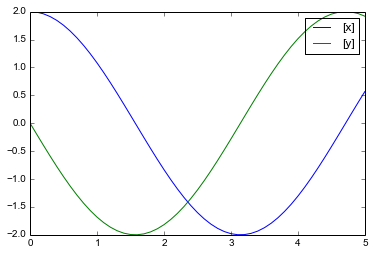

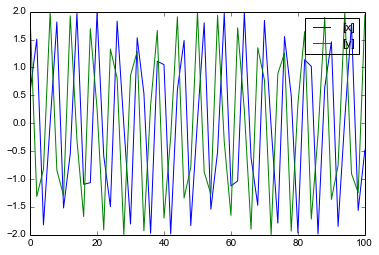

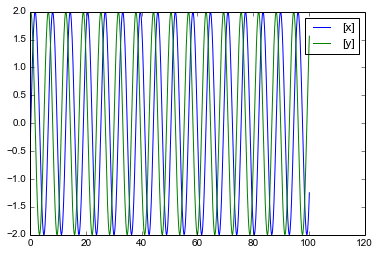

In [29]:
%matplotlib inline
rr = roadrunner.RoadRunner('van_der_pol.xml')
rr.simulate(start=0, end=100, varSteps=True, stiff=True, plot=True);
rr.simulate(0, 100, varSteps=True, stiff=True, plot=True);

# unused arguments should raise a warning !
rr.simulate(start=0, duration=100, variableStep=True, stiff=True, plot=True);


## Model behavior

Evolution of the limit cycle in the phase plane. The limit cycle begins as circle and, with varying μ, become increasingly sharp. An example of a Relaxation oscillator http://en.wikipedia.org/wiki/Relaxation_oscillator.

TODO: insert the image of the phase plane

In [9]:
%matplotlib inline
import roadrunner
import matplotlib.pylab as plt

In [10]:
res = rr.simulate(start=0, duration=100, variableStep=True, stiff=True, plot=False, relative=1E-7, absolute=1E-7);

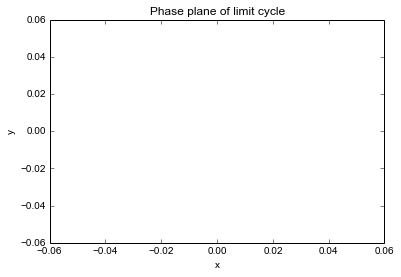

In [11]:
plt.plot(res['[x]'], res['[y]'])
plt.title('Phase plane of limit cycle')
plt.xlabel('x')
plt.ylabel('y')

In [12]:
# add the additional values of interest to the selection
rr.selections

['time', '[x]', '[y]']

In [13]:
reload(roadrunner)
rr.selections = ['time'] + rr.model.getFloatingSpeciesIds() + rr.model.getReactionIds()
rr.selections

['time', 'x', 'y', 'J1', 'J2']

In [14]:
import odesim.roadrunner.roadrunner_tools as rt
import numpy as np
results = []
mu_values = [0, 0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
for mu in mu_values:
    print mu
    s, gp = rt.simulation(rr, t_start=0, t_stop=100, parameters={'mu': mu})
    results.append(s)

0
Integration time: 0.000613927841187
0.01
Integration time: 0.000119924545288
0.5
Integration time: 0.000111818313599
1.0
Integration time: 0.000114917755127
1.5
Integration time: 0.000148057937622
2.0
Integration time: 9.60826873779e-05
2.5
Integration time: 0.000107049942017
3.0
Integration time: 6.31809234619e-05
3.5
Integration time: 9.98973846436e-05
4.0
Integration time: 6.29425048828e-05


In [15]:
plt.figure(figsize=(4,14))
for k, mu in enumerate(mu_values):
    res = results[k]
    plt.plot(res['[x]'], res['[y]'], color='black')
plt.title('Phase plane of limit cycle')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.xlim([-2,2])
plt.ylim([-7,7])

ValueError: field named [x] not found

In [16]:
# Phase portrait